In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [3]:
data = pd.read_csv('/Users/francescamees/Desktop/dtu/computational_data_analysis/CDA_Case_2/data/data_pre_processed.csv')

In [12]:
data_stats = data[['Cohort','Individual','Round','Phase','Puzzler']]

In [10]:
data_bio = data[data.columns[5:56]]
data_bio_hr = data_bio.iloc[:, 0:12]
data_bio_temp = data_bio.iloc[:, 12:24]
data_bio_eda = data_bio.iloc[:, 24:]

In [11]:
data_emo = data[list(data.columns[-11:])]

In [14]:
def correlation_matrix_with_significance(df_emotions, df_bio, alpha_1=0.01, alpha_2=0.001):
    """
    Computes pairwise correlations between columns of two DataFrames (emotion vs bio features),
    along with significance stars.
    """

    corr_matrix = pd.DataFrame(index=df_emotions.columns, columns=df_bio.columns, dtype=float)
    star_matrix = pd.DataFrame(index=df_emotions.columns, columns=df_bio.columns, dtype=object)

    # Compute correlations and p-values
    for emo in df_emotions.columns:
        for bio in df_bio.columns:
            r, p = pearsonr(df_emotions[emo], df_bio[bio])
            corr_matrix.loc[emo, bio] = r
            if p < alpha_2:
                star_matrix.loc[emo, bio] = "**"
            elif p < alpha_1:
                star_matrix.loc[emo, bio] = "*"
            else:
                star_matrix.loc[emo, bio] = ""

    return corr_matrix.astype(float), star_matrix

def plot_correlation_heatmap(corr_matrix, star_matrix, title="Emotion vs Biological Feature Correlation"):
    """
    Plots a heatmap of correlations with significance asterisks.
    """
    mask = np.zeros_like(corr_matrix, dtype=bool)
    plt.figure(figsize=(12, 8))
    cmap = sns.diverging_palette(240, 10, as_cmap=True)  # blue to red

    # Plot heatmap
    ax = sns.heatmap(corr_matrix, annot=False, cmap=cmap, center=0, mask=mask,
                     cbar_kws={'label': 'Pearson Correlation'}, linewidths=0.5, vmin=-1, vmax=1)

    # Add asterisks
    for i in range(corr_matrix.shape[0]):
        for j in range(corr_matrix.shape[1]):
            star = star_matrix.iloc[i, j]
            ax.text(j + 0.5, i + 0.5, star, ha='center', va='center', color='black', fontsize=14, fontweight='bold')


    plt.title(title)
    plt.ylabel("Emotions")
    plt.xlabel("Biological Features")
    plt.tight_layout()
    plt.show()

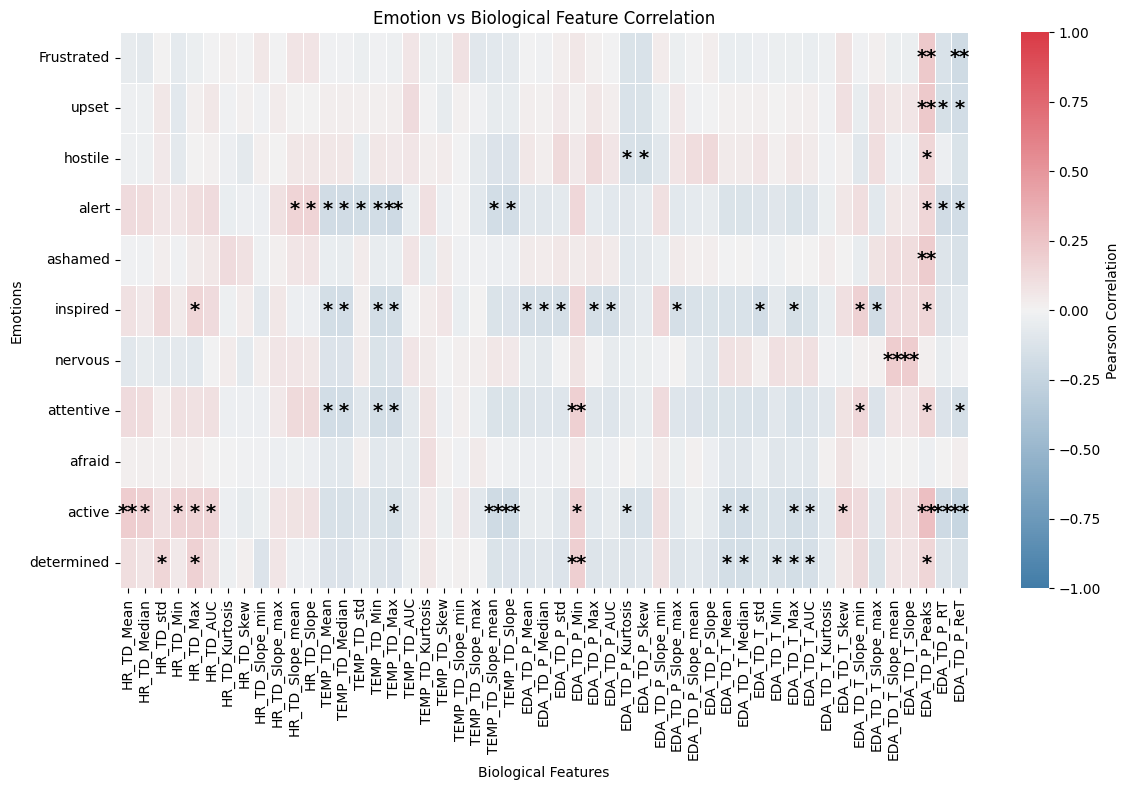

In [15]:
#Association between caregiver well-being features and children well-being and clinical features,
# measured using Pearson’s correlation. TO DO The significance testing was corrected for multiple comparisons using
#Benjaminini-Yekutieli false discovery control method (*p<0.01, ** p<0.001).
corr_matrix, star_matrix = correlation_matrix_with_significance(data_emo, data_bio)
plot_correlation_heatmap(corr_matrix, star_matrix)


In [16]:
# Positive correlations (red) indicate that as one variable increases, the other tends to increase. Negative correlations (blue) indicate that as one variable increases, the other tends to decrease. The asterisks indicate significant
#correlations, meaning that one asterisk (*) means a significant correlation at p < 0.01, and two asterisks (**) indicate a highly significant correlation at p < 0.001.

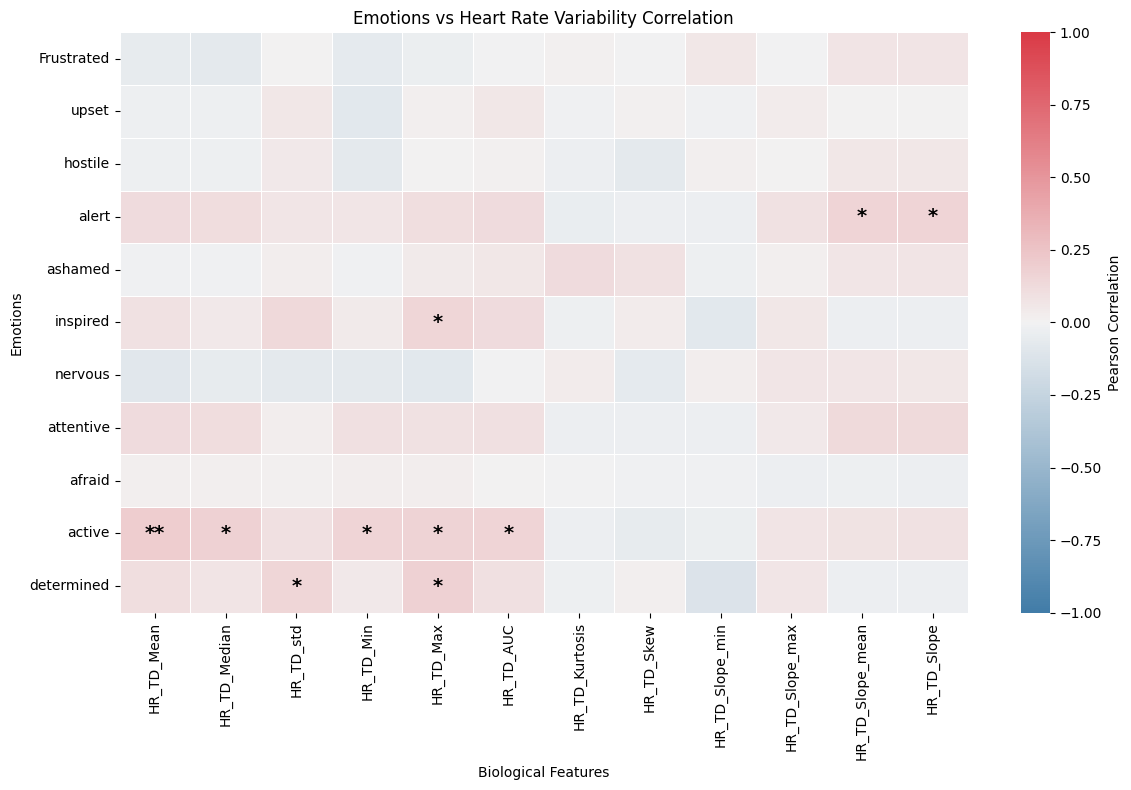

In [24]:
corr_matrix, star_matrix = correlation_matrix_with_significance(data_emo, data_bio_hr)
plot_correlation_heatmap(corr_matrix, star_matrix, title="Emotions vs Heart Rate Variability Correlation")

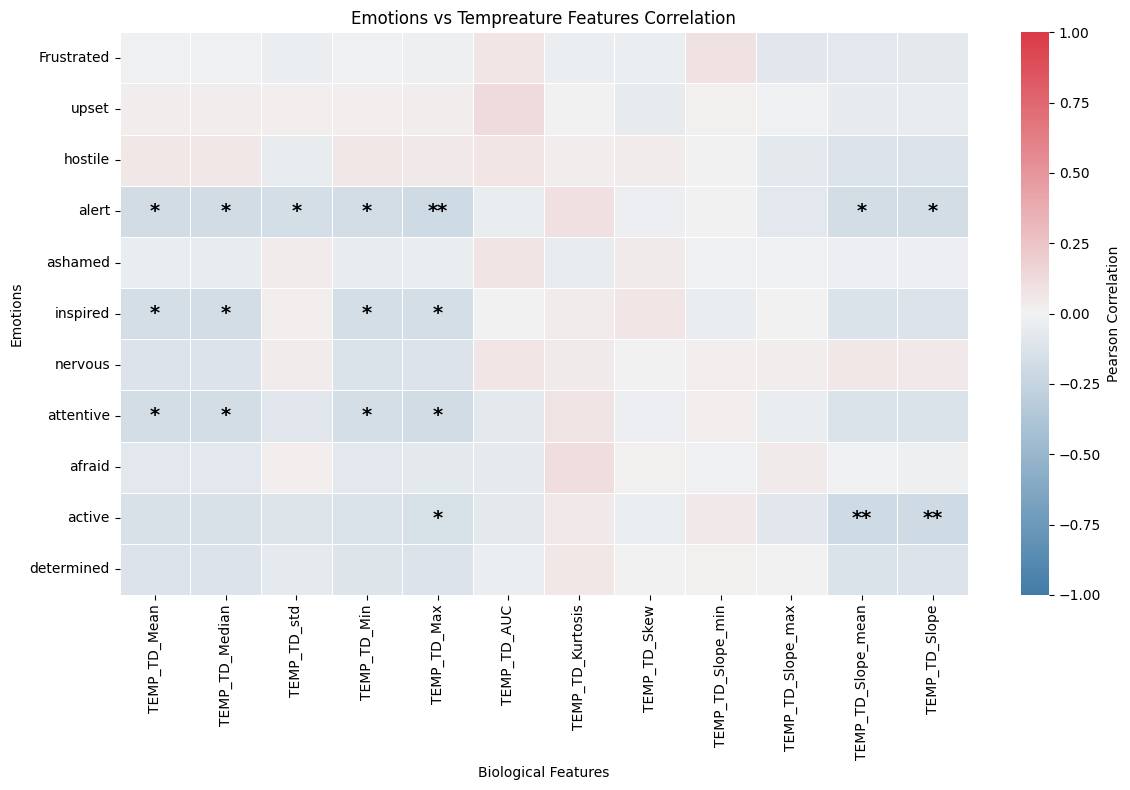

In [23]:
corr_matrix, star_matrix = correlation_matrix_with_significance(data_emo, data_bio_temp)
plot_correlation_heatmap(corr_matrix, star_matrix, title="Emotions vs Tempreature Features Correlation")

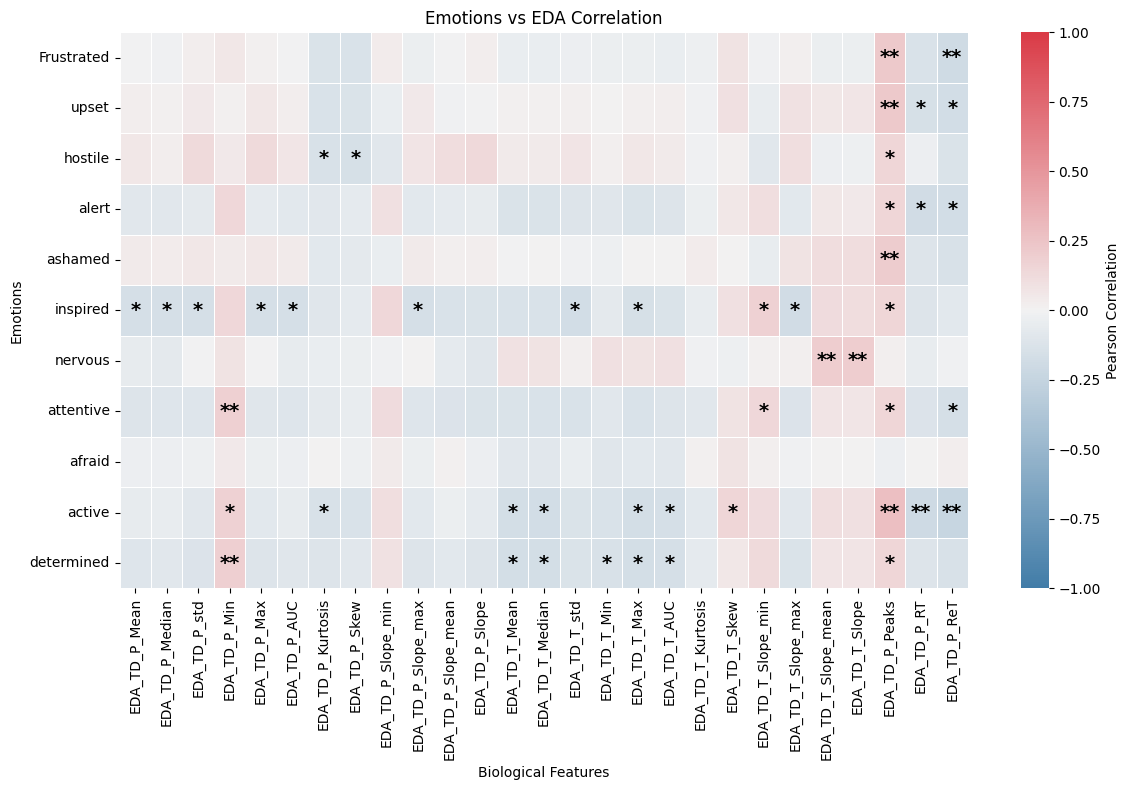

In [22]:
corr_matrix, star_matrix = correlation_matrix_with_significance(data_emo, data_bio_eda)
plot_correlation_heatmap(corr_matrix, star_matrix, title="Emotions vs EDA Correlation")

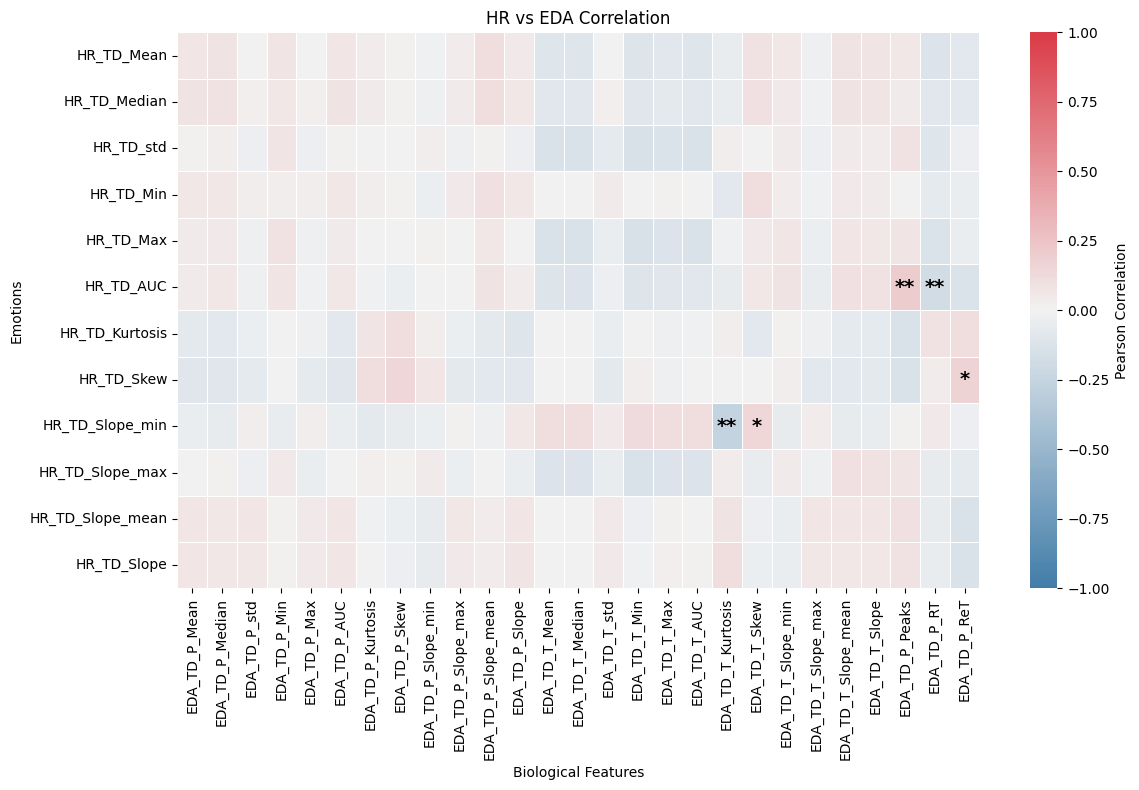

In [21]:
corr_matrix, star_matrix = correlation_matrix_with_significance(data_bio_hr, data_bio_eda)
plot_correlation_heatmap(corr_matrix, star_matrix, title="HR vs EDA Correlation")